# Sesión 4: Medición de asimetrías para el decaimiento de un mesón B

# Introducción

Este archivo es una versión modificada del proyecto que se encuentra en la página de datos abiertos del LHCB que pueden encontrar [aquí](https://opendata.cern.ch/record/4900). En este proyecto vamos a analizar las asimetrías que existen entre materia/antimateria para el decaimiento del mesón B. Este proyecto contiene las bases de la investigación que se hace en el LHCb. No se requiere conocimiento muy avanzado en física de partículas o mecánica cuántica y los pasos se seguirán lentamente. 
<div style="text-align: justify">
En este análisis vamos a estudiar las diferencias entre los decaimientos: B<sup>+</sup> → K<sup>+</sup>K<sup>+</sup>K<sup>−</sup> y
B<sup>-</sup> → K<sup>+</sup>K<sup>-</sup>K<sup>−</sup>.
En donde B<sup>-</sup> es la antipartícula de B<sup>+</sup>. B<sup>+</sup> son mesones que están compuestos de un quark *u* y un anti-quark *b* y viceversa para su antíparticula. Dado que los quarks no pueden existir en estados libres debido a la naturaleza de la interacción fuerte (este principio se denomina confinamiento de color), siempre los encontramos en estados ligados llamados hadrones. Existen dos tipos de hadrones: mesones y bariones (aunque se han descubierto estados de tetra y penta-quarks que son raros pero aun así permitidos por el principio de confinamiento de color).
Los mesones B<sup>+</sup> and B<sup>-</sup> tienen un tiempo de vida muy corto (10<sup>-12</sup> s) y decaen por medio de la interacción débil en otras partículas. En el caso de este análisis las partículas decaen en kaones. El K<sup>+</sup> es un mesón compuesto de un quark *u* y un antiquark *s* (strange) y tiene carga positiva. El K<sup>-</sup> es su antíparticula. 
Los mesones B<sup>+</sup> and B<sup>-</sup> no se observan directamente en el detector debido a su tiempo de vida demasiado corto. Ellos solo llegan a viajar unos pocos milímetros antes de decaer. Por otro lado los kaones tienen un tiempo de vida lo suficientemente largo (10<sup>-8</sup>s) como pasar por el detector LHCb. Y por ende son las propiedades de estas partículas son las que medimos en el detector.
</div>


**El detector LHCb**
En la imagen de abajo se puede apreciar el detector LHCb, con las componentes principales señaladas:
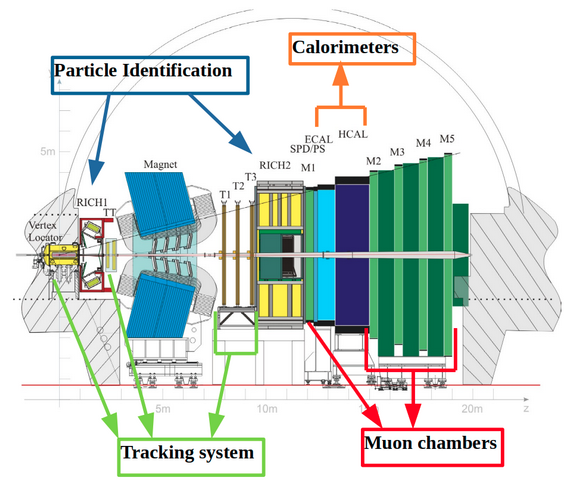
<div style="text-align: justify"> 
El sistema de **identificación de partículas** utiliza radiación de Chrenkov para diferenciar entre las distintas partículas. Cuando una partícula viaja en un medio con una velocidad mayor que la velocidad de la luz, se forma una especie de onda de choque que forma un cono de luz alrededor de la partícula. Esto se puede asociar al momento de cada partícula y de esta forma identificar por medio de la masa. 
El **sistema de tracking** es principalmente usado para medir el momento de las partículas por medio de la reconstrucción de las trayectorias, se tiene cámaras que detectan el paso de las partículas y un imán que dobla su trayectoria y por medio de software se hace la reconstrucción de esta trayectoria, luego esto es usado para determinar el momento de la partícula.
Los **calorímetros** ayudan también en la identificación dado que los hadrones y fotones producirán lluvias, reacciones en cadena que permiten saber si una de estas partículas atravesaron el calorímetro. También son usados para calcular energía. Los **sistemas de muones** simplemente identifican muones.  </div>



En física de partículas usamos diagramas de Feynman que son representaciones gráficas de nuestros procesos en física de partículas. Estos diagramas también sirven para hacer predicciones teóricas sobre cantidades físicas como la tasa de decaimiento y la sección de choque. En el caso de nuestro decaimiento, el diagrama que lo representa se ve así:

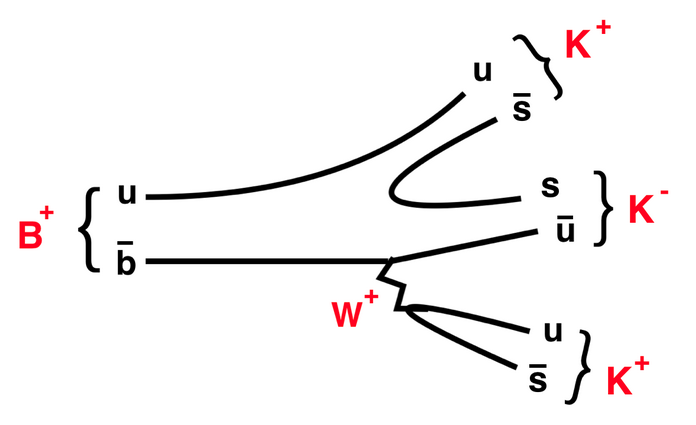

Ahora vamos a comenzar con el análisis

<div style="text-align: justify"> 
 En esta ocasión vamos a realizar nuestro código usando pỳthon, aunque se puede utilizar diversos lenguajes de programación. En física de partículas se utiliza la plataforma ROOT CERN que tiene varias bibliotecas y soporta varios lenguajes de programación pero está principalmente diseñada para C++. Es importante saber python porque hay ocasiones en que algunos métodos son mejor aplicados en python que en C++ y en ROOT en general. Esta plataforma se conecta con python por medio de la biblioteca uproot o también pyROOT, para las que no vamos a entrar en muchos detalles. </div>

## Datos simulados

<div style="text-align: justify"> 
Para comenzar vamos a utilizar los datos de una simulación que es generada con software del LHCb para confirmar que todo esté correctamente equipado y escrito. ¿Por qué? Porque nuestro eventos pueden estar contaminados con background y pueden hacer nuestro análisis un poco más complicado. Además los datos reales están influenciados por la eficiencia del detector. En esta simulación se encuentran datos sin ruido y se considera que el detector es perfecto. Estos datos se encuentran en el archivo `PhaseSpaceSimulation.root` y se pueden leer con el código abajo escrito</div>

In [1]:
#Importamos las bibliotecas que vamos a usar
import numpy as np
from ipywidgets import interact
import pandas as pd
import uproot
from scipy import stats as st
from matplotlib import pyplot as plt


In [2]:
# Ahora vamos a leer el archivo usando uproot
file = uproot.open('PhaseSpaceSimulation.root')
tree = file['PhaseSpaceTree']
# Imprimimos las branches
print(tree.keys())
# Leemos una Branch como un array
H1PX = tree['H1_PX'].array(library='np')
# Leemos datos como una DataFrame
Part1 = tree.arrays(['H1_PX', 'H1_PY', 'H1_PZ'], library='pd')
print(Part1)

['B_FlightDistance', 'B_VertexChi2', 'H1_PX', 'H1_PY', 'H1_PZ', 'H1_ProbK', 'H1_ProbPi', 'H1_Charge', 'H1_IPChi2', 'H1_isMuon', 'H2_PX', 'H2_PY', 'H2_PZ', 'H2_ProbK', 'H2_ProbPi', 'H2_Charge', 'H2_IPChi2', 'H2_isMuon', 'H3_PX', 'H3_PY', 'H3_PZ', 'H3_ProbK', 'H3_ProbPi', 'H3_Charge', 'H3_IPChi2', 'H3_isMuon']
          H1_PX     H1_PY      H1_PZ
0       3551.84   1636.96   23904.14
1      -2525.98  -5284.05   35822.00
2       -700.67   1299.73    8127.76
3       3364.63   1397.30  222815.29
4       -581.66  -1305.24   22249.59
...         ...       ...        ...
49995   6040.17   7325.91  193467.67
49996 -11641.21 -53089.92  209649.33
49997   1238.99   -263.53   10357.60
49998  18814.81  -1548.02   94738.26
49999  50835.28 -70318.75  495834.78

[50000 rows x 3 columns]


<div style="text-align: justify"> Existe otra forma de leer todo este archivo como DataFrame sin tener que escribir todas las keys ¿pueden encontrarlo en le biblioteca uproot?. Ahora ya tenemos acceso a los datos y podemos utilizarlos para realizar el análisis. Estos datos contienen información sobre eventos que son observados por el detector, estos eventos vienen de la colisión de protones en el LHC. Los datos contienen información sobre las partículas después de la colisión. Cada entrada en el DataFrame tiene que ver con una cantidad física relacionada a las partículas en estos eventos. Nosotros estamos interesados en los eventos en los que tenemos decaimientos de partículas B<sup>+</sup> o B<sup>-</sup> decayendo en tres kaones (K<sup>+</sup> or K<sup>-</sup>). Los eventos que se encuentran en el conjunto de datos son eventos en los que este proceso ha ocurrido. El detector reconstruye las trayectorias de las partículas que podrían ser kaones y de esta información tenemos el momento, carga y la probabilidad de que estas partículas sean en efecto kaones. En la tabla abajo podemos ver la información relevante sobre cada variable.</div>

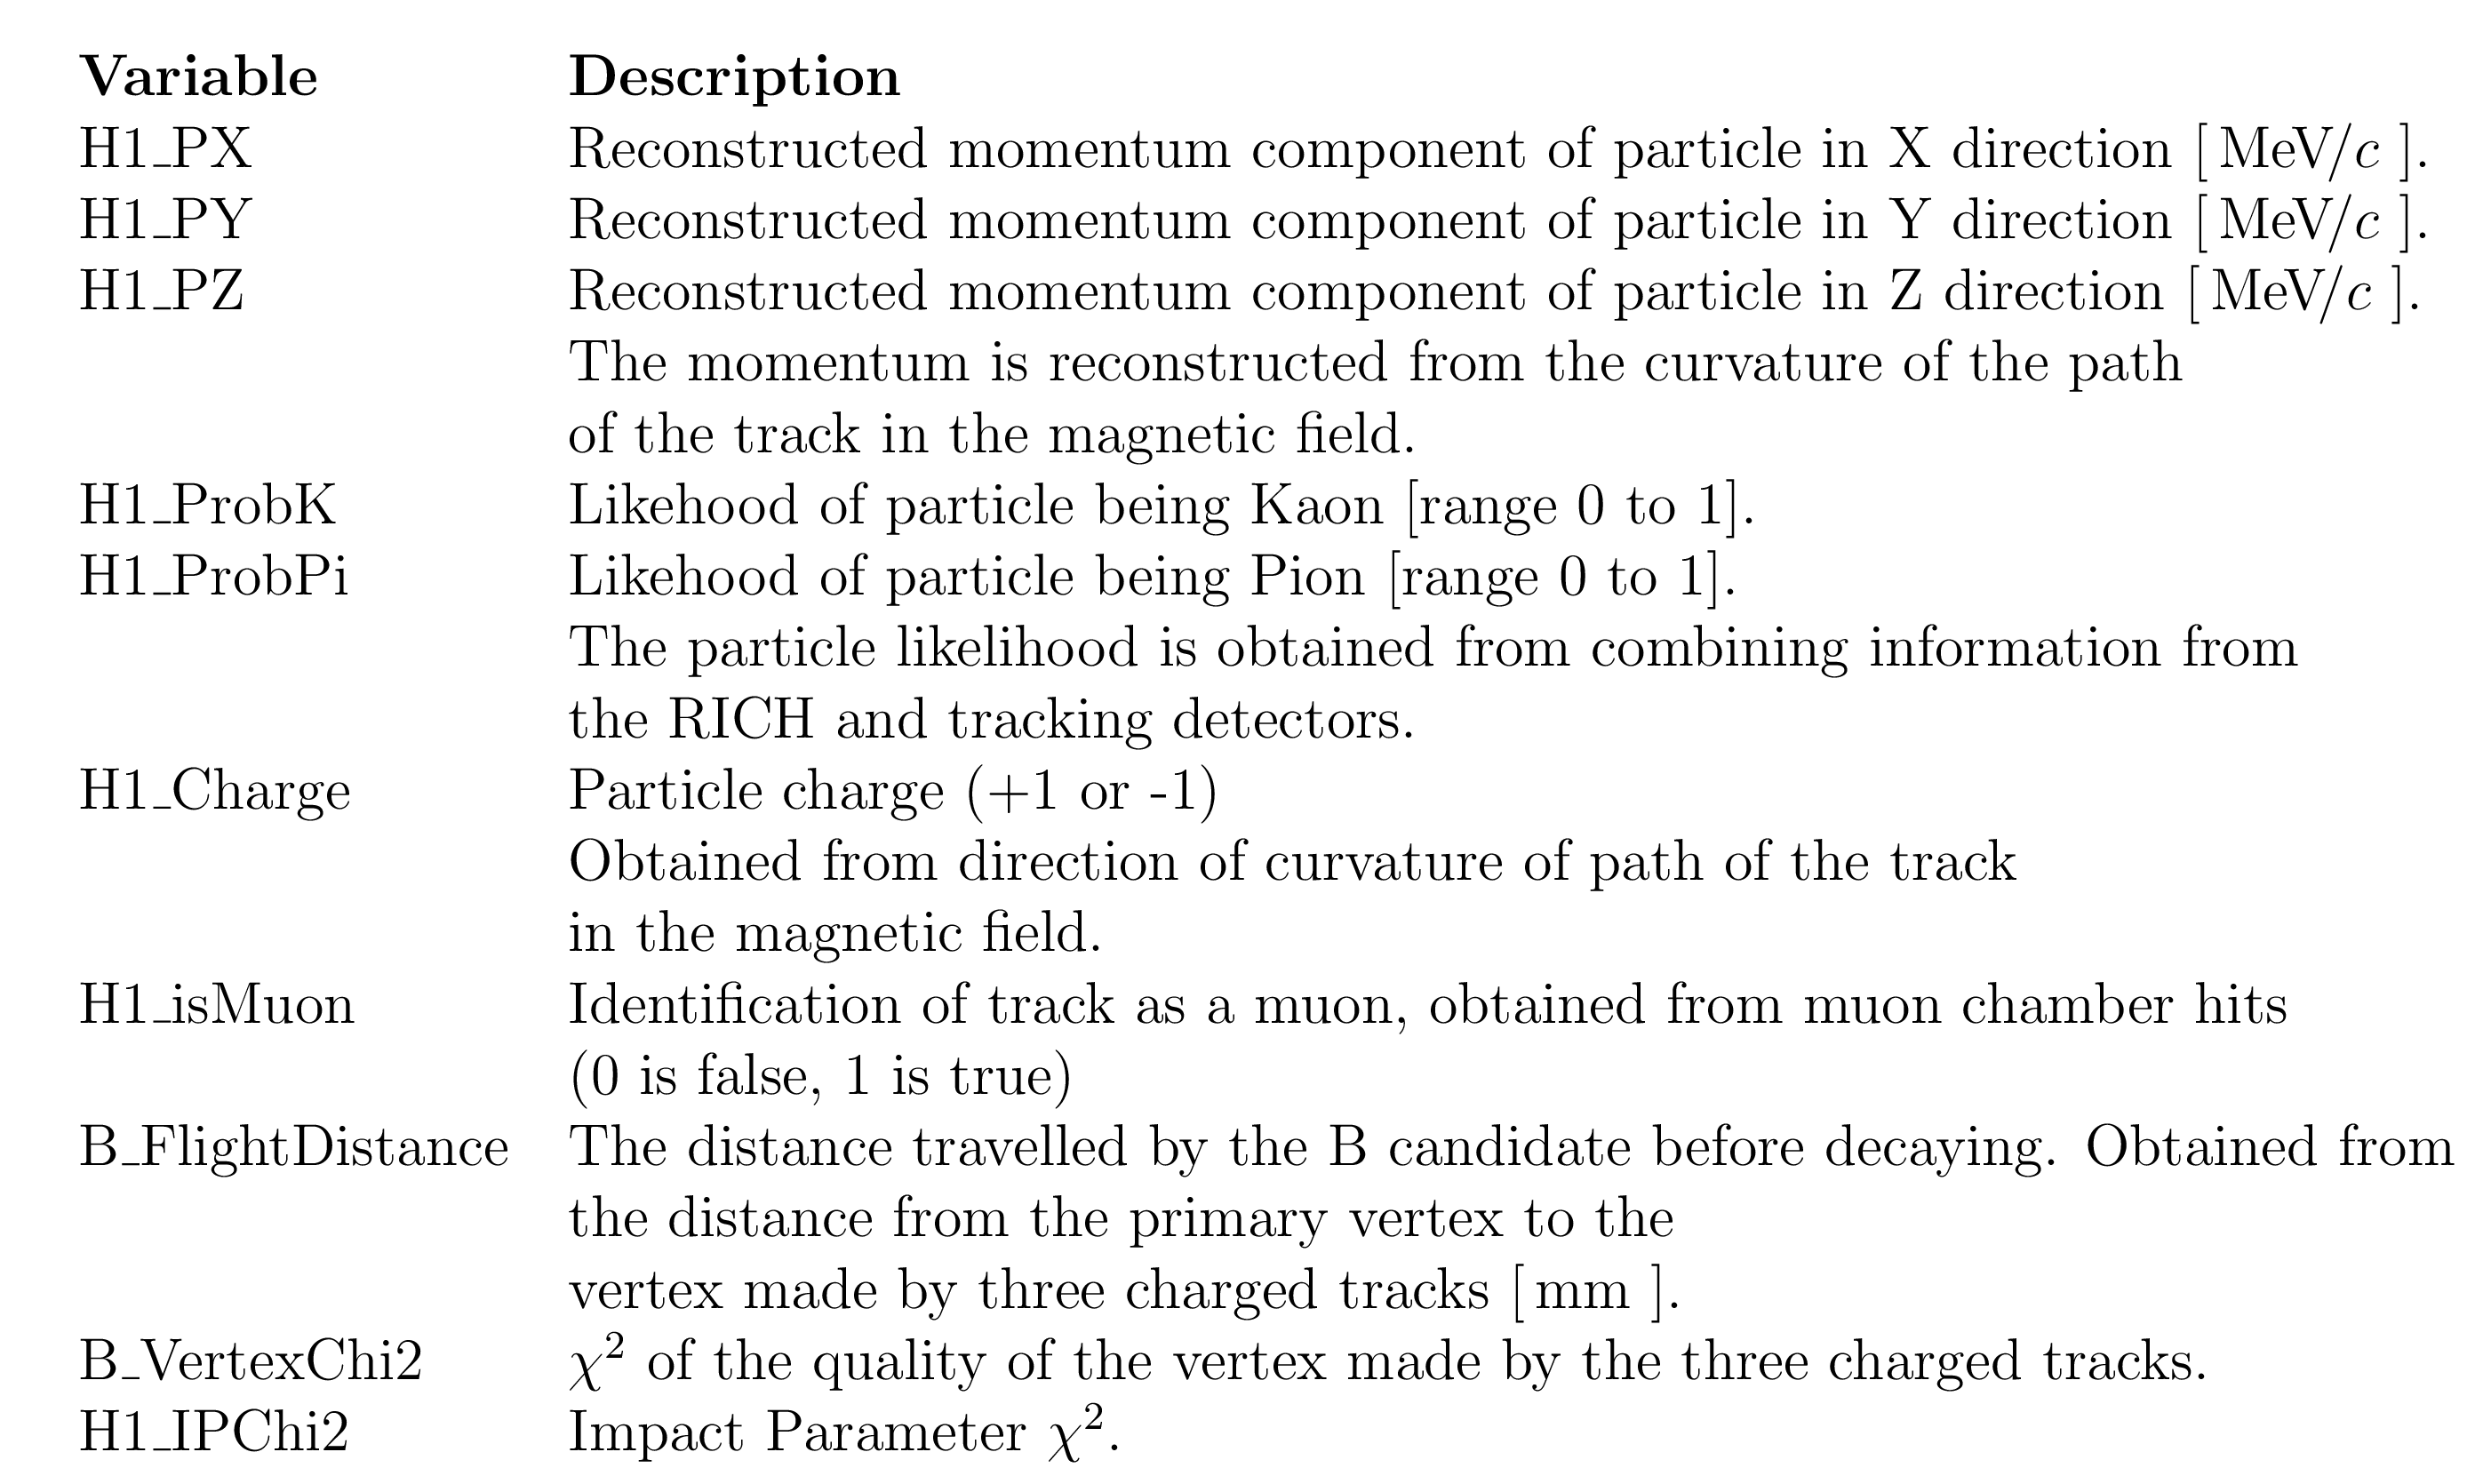

## Reconstrucción de la masa invariante

Vamos aquí a comenzar a plotar los datos usando los métodos que aprendimos en sesiones anteriores. Como ustedes ya deben saberlo, el momento es un vector con tres componentes. Aquí calculamos la **magnitud** del momento para la primera partícula usando las variables `H1_PX`, `H1_PY` and `H1_PZ` que son los valores de momento para cada coordenada.

In [28]:
# Aquí calculamos la magnitud del momento para la primera partícula


# plotamos un histograma con esta variable

**Magnitud de un vector** Recuerden que la magnitud al cuadrado de un vector es dada por la suma de los cuadrados de las componentes: $p^2 = p_x^2+p_y^2+p_z^2$, donde $p$ es la magnitud del vector y $p_x,p_y,p_z$ son las componentes del vector en X,Y y Z.

### Energía y masa

De la relatividad especial nosotros conocemos la relación momento-masa-energía de Einstein. Dado que tenemos la magnitud de los momentos para los kaones podemos calcular la energía de estas partículas con la relación de Einstein. La masa del kaon se puede buscar en línea (cosa importante: en los datos usamos unidades MeV/$c^2$ para la masa, MeV/$c$ para el momento y MeV para la energía, entonces no es necesario incluir los factores de c).
Podemos entonces calcular la energía de las partículas usando la relación:

<center> $E^2 = p^2 + m^2$ </center>

In [29]:
#calculamos la energía de la primera partícula

#plotamos un histograma con esta variable

**Masa del kaon** - esta información se puede encontrar en línea en cualquier sitio website. Los físicos usamos los datos del Particle Data Group  [aquí](http://pdg.lbl.gov/2014/reviews/rpp2014-rev-charged-kaon-mass.pdf), que tiene información relevante sobre partículas. 

Ahora calculamos la energía para los otros dos kaones


In [30]:
# Calculamos la energía de las otras partículas
# Plotamos los histogramas correspondientes

### Cantidades físicas del mesón B
La energía y el momento son cantidades conservadas entonces podemos usar conservación para determinar la energía y momento del mesón B

**Conservación de energía** - La energía del mesón B será igual a la suma de las energías de los kaones: $E_B=E_{K1}+E_{K2}+E_{K3}$, donde $E_B$ es la energía del mesón B y $E_{K1}, E_{K2}, E_{K3}$ son las energías de los kaones. 

**Conservación de momento** - El momento se conserva por coordenadas, por ejemplo para x: $px_B=px_{K1}+px_{K2}+px_{K3}$. Teniendo las componenetes X, Y y Z del momento podemos calcular la magnitud del momento del mesón B. 

**Unidades** - No olviden que los datos se encuentran en unidades 'MeV' (10<sup>6</sup> electron volts).


In [31]:
# Aquí calculamos la energía del mesón B

In [32]:
# Calculamos las componentes del momento 
# Calculamos la magnitud del momento 

In [33]:
# Calculamos la mas invariante del mesón B
# Plotamos un histograma con esta información

En esta parte finalizamos con los datos simulados. ¿cómo se verá esta distribución diferente usando datos reales?

In [34]:
# Aquí escribimos como creen que se verá esto con datos reales

## Datos reales

Aquí vamos a trabajar con datos reales para determinar la masa invariante del mesón B. Estos datos fueron colectados por CERN en el 2011, en el Run 1 del LHC. Los datos que van a ver contienen eventos filtrados que tienen una alta probabilidad de venir de eventos de decaimiento de  mesones B<sup>+</sup> or B<sup>-</sup> en tres partículas. Estamos interesados en eventos con partículas: K<sup>+</sup> or K<sup>-</sup>.
### Preselección
Ahora queremos aplicar cortes a la variables para reducir el background que tiene nuestro conjunto de datos:
Queremos partículas que cumplan las siguientes condiciones:
* Asegurarnos que no son muones (usando la variable `H1_isMuon`)
* Que tengan una baja probabilidad de ser piones (por ejemplo, `H1_ProbPi < 0.5`)
* Que tengan alta probabilidad de ser kaones (por ejemplo, `H1_ProbK > 0.5`)

En la práctica, nosotros realizamos estos cortes que son llamados específicos y luego para el background combinatorial que queda hacemos un análisis de MVA para limpiar las muestras de datos cuando ya no existen backgrounds específicos. Estos cortes se hacen tomando en cuenta el valor de la significancia <span style="white-space: nowrap; font-size:larger">
s / &radic;<span style="text-decoration:overline;">&nbsp;s + b&nbsp;</span>
</span>, donde **s**  es el número estimado de eventos de señal y **b** es el número estimado de eventos de background. Aquí vamos a crear un nuevo DataFrame con cortes (por ahora pueden experimentar con cortes en las varibales que quieran para comenzar y luego pueden ajustar estos cortes viendo la distribución de masa del mesón B). No necesitan calcular el valor de la significancia dado que este se obtiene con fits de masa que no vamos a hacer aquí.


In [35]:
# Aquí realizamos cortes les dejo un ejemplo
preselection = "H1_ProbPi < 0.5 & H2_ProbPi < 0.5 & H3_ProbPi < 0.5 & H1_ProbK > 0.5 & H2_ProbK > 0.5 & H3_ProbK > 0.5 & !H1_isMuon & !H2_isMuon & !H3_isMuon"

Aquí cargamos los datos reales:

In [36]:
# Leemos los archivos
file1 = uproot.open('B2HHH_MagnetDown.root')
file2 = uproot.open('B2HHH_MagnetUp.root')
# tree = file['PhaseSpaceTree']
# Imprimimos las branches
# print(tree.keys())
# Leemos una Branch como un array
# H1PX = tree['H1_PX'].array(library='np')
# Leemos datos como una DataFrame
Part1 = tree.arrays(['H1_PX', 'H1_PY', 'H1_PZ'], preselection, library='pd')
# print(Part1)

FileNotFoundError: file not found

    'B2HHH_MagnetDown.root'

Files may be specified as:
   * str/bytes: relative or absolute filesystem path or URL, without any colons
         other than Windows drive letter or URL schema.
         Examples: "rel/file.root", "C:\abs\file.root", "http://where/what.root"
   * str/bytes: same with an object-within-ROOT path, separated by a colon.
         Example: "rel/file.root:tdirectory/ttree"
   * pathlib.Path: always interpreted as a filesystem path or URL only (no
         object-within-ROOT path), regardless of whether there are any colons.
         Examples: Path("rel:/file.root"), Path("/abs/path:stuff.root")

Functions that accept many files (uproot.iterate, etc.) also allow:
   * glob syntax in str/bytes and pathlib.Path.
         Examples: Path("rel/*.root"), "/abs/*.root:tdirectory/ttree"
   * dict: keys are filesystem paths, values are objects-within-ROOT paths.
         Example: {"/data_v1/*.root": "ttree_v1", "/data_v2/*.root": "ttree_v2"}
   * already-open TTree objects.
   * iterables of the above.


Para hacer los cortes podemos utilizar otros métodos como `.query` que viene incluido en `pandas`. Para ver en que valores debemos realizar los cortes primero plotamos histogramas de las variables relacionadas a las probabilidades de ser piones y kaones ¿cómo podemos hacer que estos plots sean diferentes para que los cortes sean más sofisticados?

In [37]:
# Aquí plotamos la probabilidad que la partícula sea un kaon para todos las partículas

In [38]:
# Aquí plotamos la probabilidad que la partícula sea un pion para todas las partículas

Ahora si calculamos la masa invariante del mesón B con los datos reales.

In [39]:
# Calculamos la masa invariante del mesón 
# Plotamos un histograma 

Experimenten con sus cortes y vean como cambia la distribubión de la masa invariante, el objetivo es mantener el pico lo más prominente (esto se haría con fit de masa invariante y tratando de que el valor de la significancia sea alto, pero en esta ocasión lo haremos solo al ojo). También realicen cortes en la masa invariante para excluir lo más que se pueda el background que se encuentra en las sidebands 

# Asimetrías globales para materia-antimateria

Aquí vamos a calcular las asimetrías globales entre materia-antimateria que están relacionadas a la violación CP. Global aquí significa que va a ser la cantidad de asimetría para diferentes rangos de momento y energía. Para cuantificar la asimetría queremos comparar los eventos con partículas B<sup>+</sup> y B<sup>-</sup>.

¿Cómo distiguimos eventos que tienen B<sup>+</sup> y B<sup>-</sup> usando `H1_Charge`, `H2_Charge` y `H3_Charge`? recuerden que la carga es una cantidad conservada

In [ ]:
#Aquí escribimos como podemos distinguir estos eventos

Ahora contamos el número de eventos que tenemos para cada mesón (N<sup>+</sup> y N<sup>-</sup>). Luego calculamos la diferencia entre estos números ¿cómo podemos contar estos eventos?
El último paso es definir la asimetría que está definida por:
$$A={\frac{N^--N^+}{N^-+N^+}}$$

In [40]:
# Aquí distiguimos entre procesos con B+ y B-
# contamos el número de eventos 
# aquí calculamos la asimetría

#### Estimamos la significancia de la desviación
La incertidumbre estadística está dada por la fórmula: $$\sigma_A=\sqrt{\frac{1-A^2}{N^-+N^+}}$$
La significancia se encuentra dividiendo el valor la asimetría por su incertidumbre. Un valor excediendo tres sigmas se considera como evidencia y un valor excediendo cinco o más sigmas se considera un descubrimiento u observación.

In [41]:
# Calculamos la significancia estadítica

##  Dalitz plot y resonancias en canales de dos cuerpos

Aquí vamos a hablar sobre una técnica que es muy usada en estudios de violación CP para decaimientos en tres cuerpos. En este caso tres kaones. Esta técnica se denomina análisis de Dalitz plot 

El decaimiento del mesón B puede proceder directamente en las tres partículas del estado final o podemos tener un estado intermediario. Por ejemplo, B<sup>+</sup> → K<sup>+</sup>K<sup>+</sup>K<sup>−</sup>, puede proceder mediante el decaimiento B<sup>+</sup> → K<sup>+</sup>R<sup>0</sup>, donde R<sup>0</sup> es una partícula neutral que decae en R<sup>0</sup> → K<sup>+</sup>K<sup>-</sup>. Estos estados intermediarios se conocen como resonancias y los Dalitz plots se pueden utilizar para identificar estas resonancias que aparecen como bandas en el espacio de fase.

La cinemática de un decaimiento en tres cuerpos se puede describir completamente utilizando solo dos variables. Las energías y los momentos de los tres kaones no son independientes entre sí, ya que todos provienen del decaimiento de un mesón B y la energía y el momento se conservan. Los ejes de los Dalitz Plot son convencionalmente las masas invariantes al cuadrado de dos parejas de producto de decaimiento. Las masas invariantes se definen como: $$s_{ij} = (p_i+p_j)^2$$ ,

donde $p_i, p_j$ son los momentos de dos partículas (que en nuestro caso son partículas con diferente carga). Estos Dalitz plots son histogramas 2D y la densidad de los puntos en el gráfico muestra la estructura dinámica del decaimiento. Abajo podemos ver un Dalitz plot con límites cinématicos.
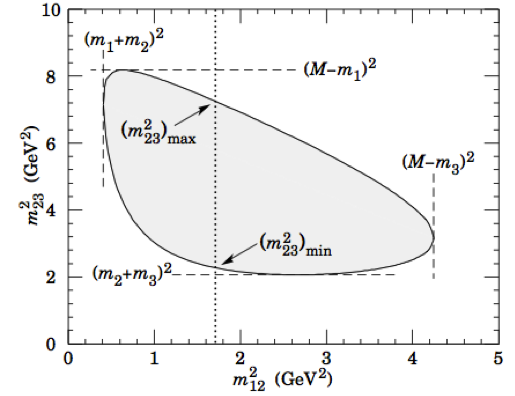



Ahora para nuestro decaimiento: B<sup>+</sup> → K<sup>+</sup><sub>1</sub>K<sup>+</sup><sub>2</sub>K<sup>−</sup><sub>3</sub>, donde ponemos números para distinguir entre los kaones. Podemos calcular la masa invariante para los estados intermediarios:  R<sup>++</sup><sub>1</sub> → K<sup>+</sup><sub>1</sub>K<sup>+</sup><sub>2</sub>, R<sup>0</sup><sub>2</sub> → K<sup>+</sup><sub>1</sub>K<sup>-</sup><sub>3</sub>, y R<sup>0</sup><sub>3</sub> → K<sup>+</sup><sub>3</sub>K<sup>-</sup><sub>3</sub>. 

R<sup>++</sup><sub>1</sub> no se toma en cuenta porque tiene doble carga.

R<sup>0</sup><sub>2</sub> and R<sup>0</sup><sub>3</sub> son canales en los que vemos resonancias y por lo tanto debemos calcular la masa invariante al cuadrado para estos canales. Estas variables deben ser usadas en el Dalitz plot. Vamos a plotar un Dalitz plot abajo. (debemos tomar en cuenta que las partículas en el conjunto de datos no están clasificadas para que la partícula 1, 2 tengan carga positiva y la partícula 3 tenga carga negativa, además de esto nuestros datos tienen mesones B positivos y negativos. ¿cómo podemos clasificar las partículas para lidiar con este problema?) Primero lo realizamos para la simulación y luego para los datos

In [42]:
# Primero calculamos las masas invariantes para cada pareja de kaones

In [43]:
# plotamos las masas invariantes para cada combinación

In [44]:
# hacemos un Dalitz plot con las masas invariantes que son relavantes para nuestro decaimiento

**Plotar el Dalitz plot** - podemos usar el método `scatter` o `hist2D` de `matplotlib` para plotar el Dalitz plot. Usen los dos.

¿Cómo se diferenciaría el Dalitz plot de la simulación con el de los datos?

In [3]:
# Aquí escribimos como creemos que se diferenciaría

### Resonancias en canales de decaimiento en dos cuerpos

Ahora podemos utilizar el DP para identificar las resonancias en nuestro canal de decaimiento. Las resonancias se muestran como bandas de mayor densidad. Pueden utilizar las tablas de con datos de mesones [PDG](http://pdg.lbl.gov/2015/tables/contents_tables.html) para identificar a que partículas corresponden. Las tablas tienen las masas y larguras de las partículas, además de sus modos de decaimiento. Una pista: están buscando resonancias que decaen en el canal K<sup>+</sup>K<sup>-</sup>.

###  Búsqueda de asimetrías locales

Probablemente en la sección anterior no encontraron un valor alto para la significancia. Esto porque la violación CP puede venir de interferencia entre las resonancias y por lo tanto esta asimetría varía a lo largo del Dalitz plot. Para ver como varía la asimetría a lo largo del DP, podemos aplicar la misma ecuación que usamos para el caso global pero ahora para regiones del Dalitz plot.

### Removemos resonancias charmosas

El análisis realizado aquí se centra en estudiar violación de CP en decaimientos del mesón B sin estados charmosos a kaones. "Sin estados charmosos" significa que el decaimiento no se produce a través de un charm quark. Sin embargo, el decaimiento más frecuente de los mesones B se produce cuando el quark *b* decae en un quark *c*. La mayoría de estos eventos se pueden eliminar rechazando los eventos que ocurren a través de un mesón D<sup>0</sup> (que contiene el quark charm).

En la sección anterior, hicieron un histograma de la masa invariante de las resonancias intermediarias y habrán observado el mesón D<sup>0</sup> tanto en este gráfico como en el Dalitz plt. Ahora deben cortar los eventos que se encuentran alrededor del rango de masas del mesón D<sup>0</sup> para suprimir esta contribución. 

Esta fue también no fue considerado cuando calculamos la asimetría global. Después de haber aplicado esta preselección, su código ahora volverá a calcular la asimetría global con la contribución del mesón D<sup>0</sup> excluida.

### Comparamos Dalitz plots

Hacemos Dalitz plots para decaimientos B<sup>+</sup> y B<sup>-</sup>.
La violación de CP local se verá como una asimetría entre los DPs de B<sup>+</sup> y de B<sup>-</sup>.  
Para que el error estadístico en cada bin no sea largo, necesitamos bins que contengan una cantidad razonable de datos probablemente bins con tamaño $2.5~\text{GeV}^2/\text{c}^4 \times 2.5~\text{GeV}^2/\text{c}^4$. ¿cómo calculamos la asimetría para cada bin? Probablemente sea útil para ustedes dividir cada DP en el mismo número de bins y comparar el contenido que tiene cada uno de estos bins.

In [46]:
# Aquí hacemos un Dalitz plot para los eventos de B+

In [47]:
# Aquí hacemos un Dalitz plot para los eventos de B-

In [48]:
# Aquí hacen un Dalitz plot mostrando las asimetrías
# esto quiere decir calcular la asimetría por bin y luego plotarlo en un DP

Observar una gran asimetría en algunas regiones del DP no significa necesariamente que se haya observado violación del CP. Si hay muy pocos eventos en esa región del espacio de fase, la incertidumbre puede ser alta y por lo tanto los valores comparables a cero.
Podemos calcular la incertidumbre estadística de la asimetría, para cada bin del gráfico, utilizando las mismas fórmulas que utilizó en la parte de asimetría global. Luego podemos hacer un gráfico que muestre la incertidumbre de la asimetría.
Al dividir el gráfico que muestra la asimetría por el gráfico que muestra la incertidumbre estadística, se puede obtener la significancia de la asimetría. Y podemos plotar esta significancia para encontrar evidencia de violación CP


In [49]:
# Plotamos la incertidumbre asimetría

In [50]:
# Plotamos la significancia estadística

### Observando violación CP

Utilizando el plot de la asimetría podemos aislar regiones donde tenemos asimetrías altas y luego comparar las distribuciones de masa invariante de B<sup>+</sup> y de B<sup>-</sup> para encontrar asimetrías

In [51]:
#Hacemos un plot de masa invariante para regiones con asimetrías largas para B+

In [52]:
# Hacemos un plot para el caso de B-

**¡Felicitaciones!** Ahora deberían haber observado con éxito evidencia significativa de violación CP. Deben tener gráficos que muestren claramente que los procesos de decaimientos de partículas y antipartículas ocurren en diferentes proporciones en las regiones locales del  Dalitz plot. Pueden comparar sus resultados con los publicados por la colaboración del LHCb en este [artículo](http://lhcbproject.web.cern.ch/lhcbproject/Publications/LHCbProjectPublic/LHCb-PAPER-2013-027.html). Este es el fin del análisis solo espero que hayan llegado hasta aquí, para los que terminen antes o quieran ver como mejorar el análisis pueden continuar leyendo

### Análisis refinado

Los datos que utilizaron aquí son los datos que se han utilizado para publicaciones importantes como estas 2 [1](http://lhcbproject.web.cern.ch/lhcbproject/Publications/LHCbProjectPublic/LHCb-PAPER-2013-027.html) and [2](http://lhcbproject.web.cern.ch/lhcbproject/Publications/LHCbProjectPublic/LHCb-PAPER-2013-051.html).
¿cómo podemos hacer para que nuestro análisis sea más parecido al realizado en las publicaciones?

### Incertidumbres sistemáticas
En este análisis se consideró la incertidumbre estadística del resultado. Esta ocurre como resultado de tener solo un número limitado de eventos. Además, existen [incertidumbres sistemáticas](https://en.wikipedia.org/wiki/Observational_error#Systematic_versus_random_error), que surgen de bias en la medición. Aquí analizamos tres fuentes de esta incertidumbre para este análisis.
<ul>
<li> Asimetría de producción. El LHC es un colisionador protón-protón y, por lo tanto, el estado inicial de la colisión no es simétrico con respecto a la materia-antimateria. En consecuencia, es posible que los mesones B<sup>+</sup> y B<sup>-</sup> no se produzcan exactamente al mismo rate. Esta pequeña asimetría de producción se estima  que podría ser de aproximadamente el 1%. También se puede medir a partir de los datos, como se encuentra mostrado en el paper del LHCb.</li>
<li> Asimetría de detección. El detector LHCb podría ser más eficiente para detectar los estados finales B<sup>+</sup> o B<sup>-</sup>. Esto se debe a que los kaones positivos y negativos serán doblados por el imán en diferentes direcciones en el detector. Si la eficiencia del detector es mayor en una región que en otra, esto producirá eficiencias más altas para K<sup>+</sup> o K<sup>-</sup> y, por lo tanto, para B<sup>+</sup. > o para B<sup>-</sup>. Por este motivo, el campo magnético del detector LHCb se invierte periódicamente. En este análisis se utilizó datos en los que el campo magnético estaba tanto hacia arriba como hacia abajo y, por lo tanto, el efecto se cancelará (parcialmente). Al comparar los resultados de las dos polaridades del imán por separado, pueden comprobar el tamaño de este efecto.</li>
<li> Técnica de análisis. La técnica de análisis que se haya utilizado puede producir bias el resultado. Una simplificación importante que hicimos en el análisis anterior fue ignorar los eventos "background". Impusimos una selección para las muestras de eventos predominantemente de señal, pero no hemos tenido en cuenta el efecto de los eventos de background residuales.</li>
</ul>

### Usar las sidebands como modelo de background

Una fuente de eventos de background surge de combinaciones aleatorias de trayectorias en eventos que se confunden con las características de eventos de "señal". Estos eventos no alcanzarán su punto máximo en la distribución de masa invariante del mesón B, sino que tendrán una distribución que varía suavemente. Observar el número y la distribución de eventos alejados del pico de masa puede permitirnos estimar el número de eventos de background debajo del pico de masa.

### Fitar las distribuciones

El siguiente nivel de sofisticación en el análisis requiere fitar las distribuciones de eventos que se observan en la distribución de masa B para estimar la cantidad de eventos de señal y eventos de background en la región de señal. Pueden ver cómo se hace esto en el documento del LHCb sobre este análisis. El fit se puede realizar utilizando la plataforma [ROOT CERN](https://root.cern.ch/).